In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
#Load data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
print(boston.shape)
boston.head()

(1012, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


# Regression Model

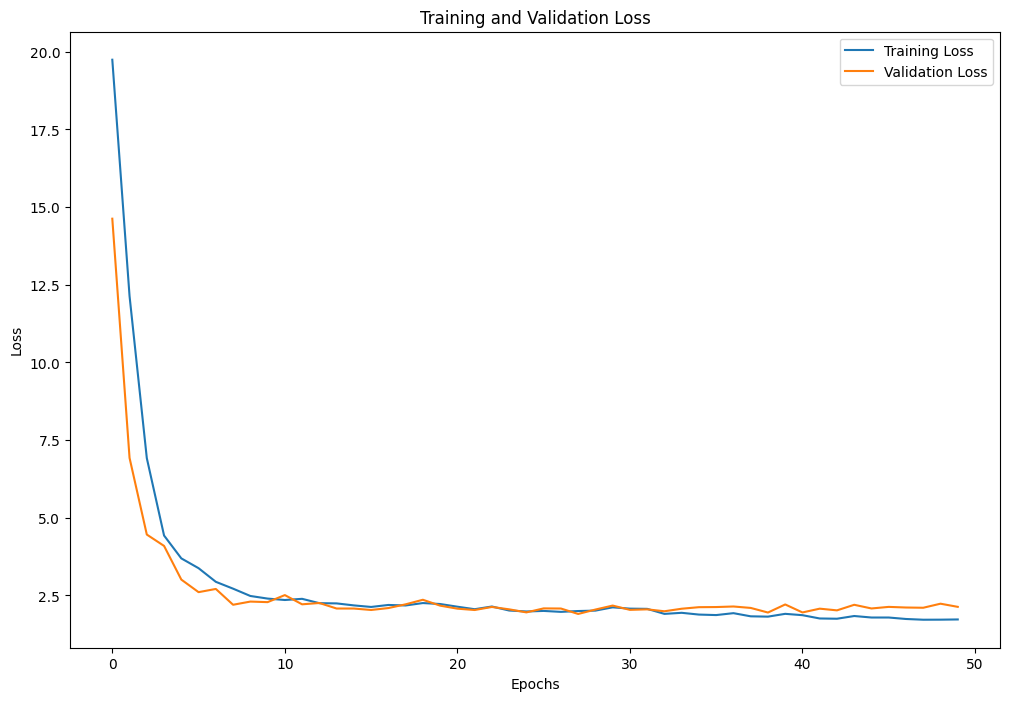

2.134686231613159

In [ ]:
#Split into test and training dataset
x = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
y = boston.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Normalize data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

#Build model
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      layers.Dense(100, activation='relu'),
      # layers.Dense(64, activation='relu'),
      # layers.Dense(64, activation='relu'),
      # layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(0.01))
  return model

model = build_and_compile_model(normalizer)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.evaluate(X_test, y_test, verbose=0)

4/4 [==============================] - 0s 8ms/step


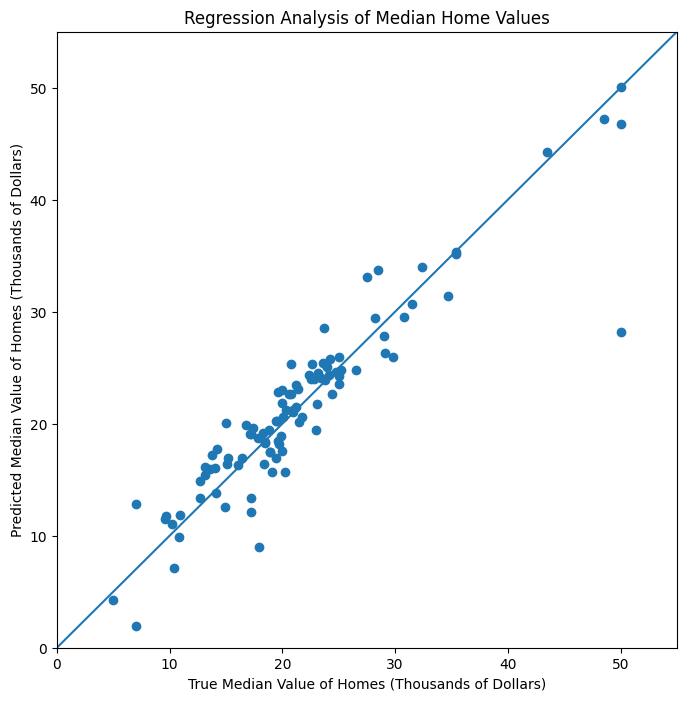

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_test, test_predictions)
plt.title('Regression Analysis of Median Home Values')
plt.xlabel('True Median Value of Homes (Thousands of Dollars)')
plt.ylabel('Predicted Median Value of Homes (Thousands of Dollars)')
lims = [0, 55]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

#Classification Model

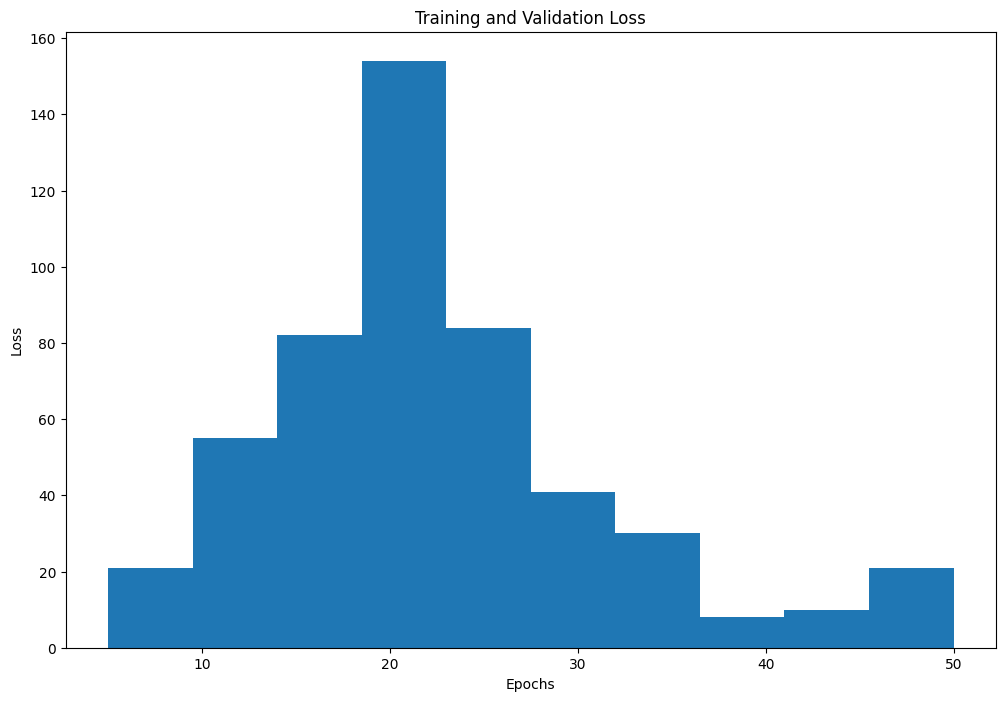

21.2


In [ ]:
#Plot median house values to visualize distribution
plt.figure(figsize=(12, 8))
plt.hist(boston.values[1::2, 2])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print(np.median(boston.values[1::2, 2]))

In [ ]:
#Split into test and training dataset
#Houses over 22 are expensive (1)
#Houses below 22 are inexpensive (0)
x = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
y = boston.values[1::2, 2]
y[y<=22] = 0
y[y>22] = 1
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Normalize data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

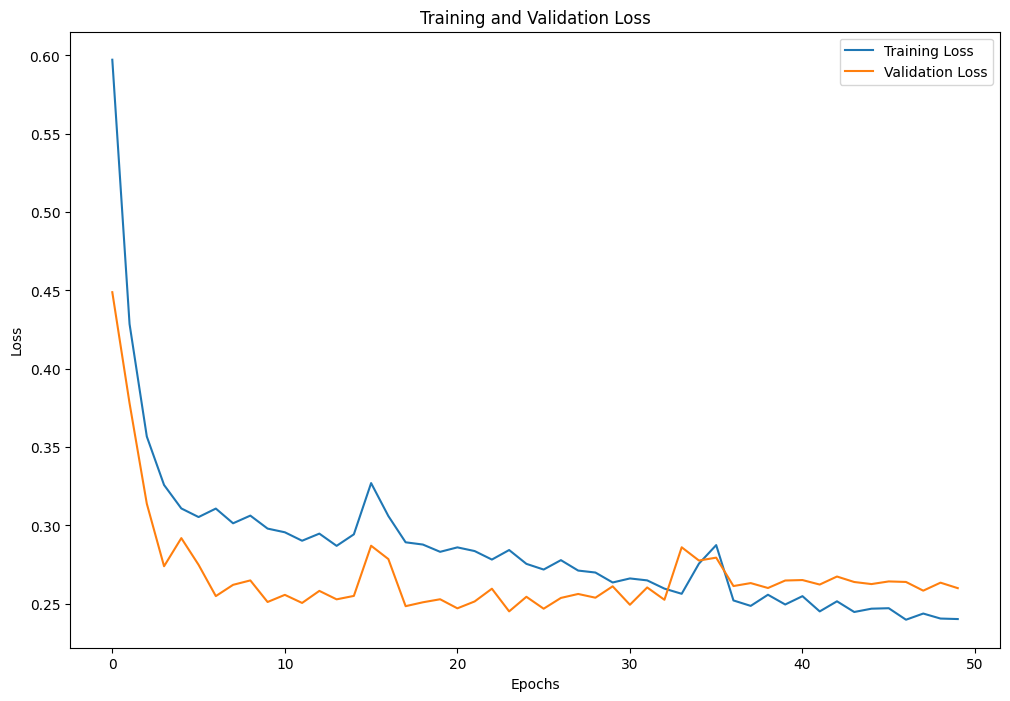

[0.2599508464336395,
 0.9117646813392639,
 0.9411764740943909,
 0.8205128312110901]

In [ ]:
#Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation='sigmoid'),
    # tf.keras.layers.Dense(64, activation='sigmoid'),
    # tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.evaluate(X_test, y_test, verbose=0)